<a href="https://colab.research.google.com/github/mayank55136/sparksfoundation-internship/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 1**
       **Prediction Using Supervised Learning**





1.   Importing the dataset



In [1]:
##Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings as wg
wg.filterwarnings("ignore")

In [3]:
## Reading the data
url="http://bit.ly/w-data"
rd=pd.read_csv(url)

In [4]:
rd.head() ##looking the data set

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
rd.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
##To know no of rows and columns 
rd.shape

(25, 2)

In [7]:
rd.describe() ##it describes the indepth mathematical informations about dataset

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
##Here we will check if dataset contains null or missing values
rd.isnull().sum()

Hours     0
Scores    0
dtype: int64


2.   **Visualising** **the** **Dataset**



Here we will plot the data and try to evaluate some mathematical relationships between the two variables





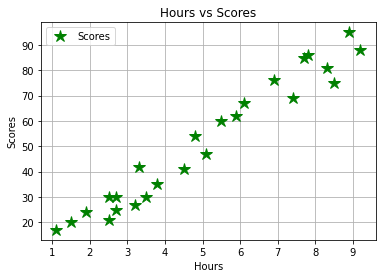

In [12]:
##Plotting the dataset

rd.plot(x="Hours",y="Scores",style="*",color="green",markersize=12)
plt.title("Hours vs Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.grid()
plt.show()

**Imp Observation-Through the above graph there is a linear relationship between "hours" and "scores".So we can use linear regression to predict further values**

In [13]:
## We can use .corr to determine the corelation between the variables
rd.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**3-Data Preparation**
In this step we will divide the data into "features"(inputs) and "labels"(output).After that we will split the whole dataset into 2 parts-testing and training data





In [14]:
rd.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [15]:
##Using iloc function we will divide the data
a=rd.iloc[:, :1].values
b=rd.iloc[:, 1:].values

In [16]:
a

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [17]:
b

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]])

In [21]:
##Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.2,random_state=0)

**4-Training The Algorithm**

We have splitted data into training and testing datasets and will now train the model.


In [22]:
from sklearn.linear_model import LinearRegression
md=LinearRegression()
md.fit(a_train,b_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**5-Visualizing the model**

After train let's visalize

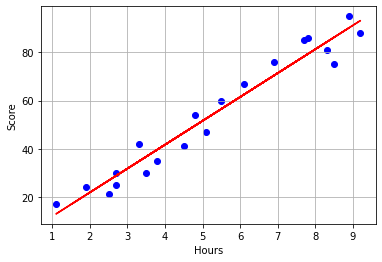

In [25]:
line=md.coef_*a+ md.intercept_
#Plot for training data
plt.scatter(a_train,b_train,color="blue")
plt.plot(a,line,color="red")
plt.xlabel("Hours")
plt.ylabel("Score")
plt.grid()
plt.show()

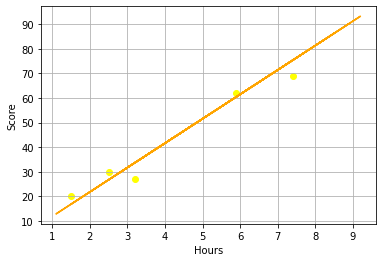

In [27]:
##Plotting for testing data
plt.scatter(a_test,b_test,color="yellow")
plt.plot(a,line,color="orange")
plt.xlabel("Hours")
plt.ylabel("Score")
plt.grid()
plt.show()

**6-Making Predictions**

Now after training our model let's make some predictions.



In [31]:
print(a_test)
b_pred=md.predict(a_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [29]:
##Comparing Actual vs Predicted
b_test


array([[20],
       [27],
       [69],
       [30],
       [62]])

In [32]:
b_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [33]:
#Comparing Actual vs Predicted
comp=pd.DataFrame({'Actual':[b_test],'Predicted':[b_pred]})
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398023], [33.732260779489835], [..."


In [34]:
##Testing with your own data
hours=9.25
own_pred=md.predict([[hours]])
print("The predicted score if a person studies for",hours,"hours is",own_pred[0])

The predicted score if a person studies for 9.25 hours is [93.69173249]


**7-Evaluation of Model**

At last we are going to evaluate our trained model by calculating mean absolute error

In [35]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(b_test,b_pred))

Mean Absolute Error: 4.183859899002982
